In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

plt.style.use('fivethirtyeight')
%matplotlib inline

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
# Data Exploration
train_data = pd.read_csv(r"D:\hate speech\Hate-speech-detection-main\hate-speech-data\train.csv")
test_data = pd.read_csv(r"D:\hate speech\Hate-speech-detection-main\hate-speech-data\test.csv")

In [3]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [6]:
# Train VS Test dataset
train_data.shape, test_data.shape

((31962, 3), (17197, 2))

In [7]:
labels = {0: "not offensive", 1: "offensive"}
print(labels)

{0: 'not offensive', 1: 'offensive'}


In [8]:
train_data.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [9]:
train_data.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [11]:
test_data.isna().sum()

id       0
tweet    0
dtype: int64

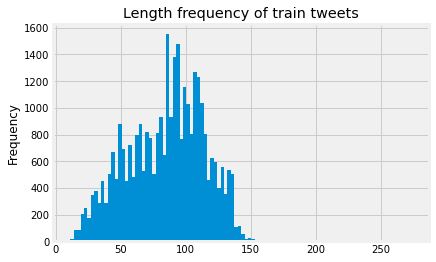

In [12]:
# Length of the tweet in train dataset
train_data['tweet'].apply(len).plot(bins=100, kind = 'hist')
plt.title('Length frequency of train tweets')
plt.show()

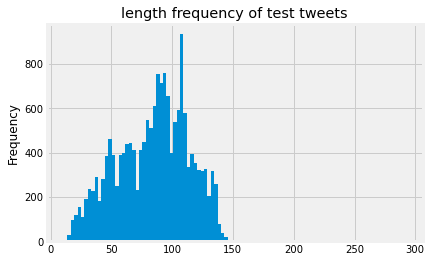

In [13]:
# Length of the tweet in test dataset
test_data['tweet'].apply(len).plot(bins=100, kind= 'hist')
plt.title('length frequency of test tweets')
plt.show()

In [14]:
# Check out a few non racist/sexist (negative) tweets
train_data[train_data['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [15]:
# Check out a few racist/sexist (positive) tweets.
train_data[train_data['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [16]:
# get counts
train_data["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [17]:
# get counts and percentages
counts = pd.DataFrame({
    'Label': train_data['label'].value_counts().index,
    'Count': train_data['label'].value_counts().values,
    'Percentage': train_data['label'].value_counts().values/train_data.shape[0]
})
counts.head()

,Label,Count,Percentage
0,0,29720,0.929854
1,1,2242,0.070146


In [18]:
# get percentages 
positive_tweet = train_data['label'].value_counts()[0]
negative_tweet = train_data['label'].value_counts()[1]

total = len(train_data)
print('percentage of positive tweets: ', (positive_tweet/total)*100)
print('percentage of negative tweets: ', (negative_tweet/total)*100)

percentage of positive tweets:  92.98542018647143
percentage of negative tweets:  7.014579813528565


Tweets without hate speech represents almost 93% of the dataset

In [20]:
train_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


In [21]:
#Creating the length column for tweet
train_data['length_of_tweet'] = [len(t) for t in train_data.tweet]
train_data

,id,label,tweet,length_of_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,102
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86
4,5,0,factsguide: society now #motivation,39
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,68
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,131
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,63
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act",67


Average Tweet Length vs label

C:\Users\Arjit Giri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


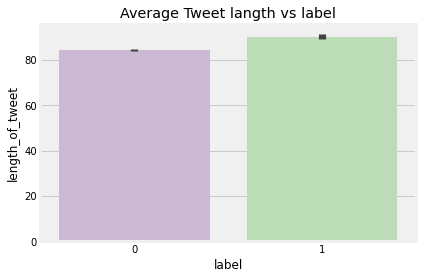

In [22]:
sns.barplot('label','length_of_tweet', data = train_data, palette= 'PRGn')
plt.title('Average Tweet langth vs label')
plt.show()

C:\Users\Arjit Giri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


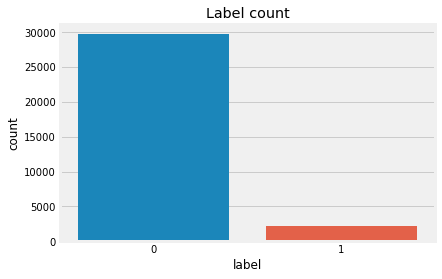

In [23]:
sns.countplot('label', data= train_data)
plt.title("Label count")
plt.show()

 Average hate tweets vs normal tweets

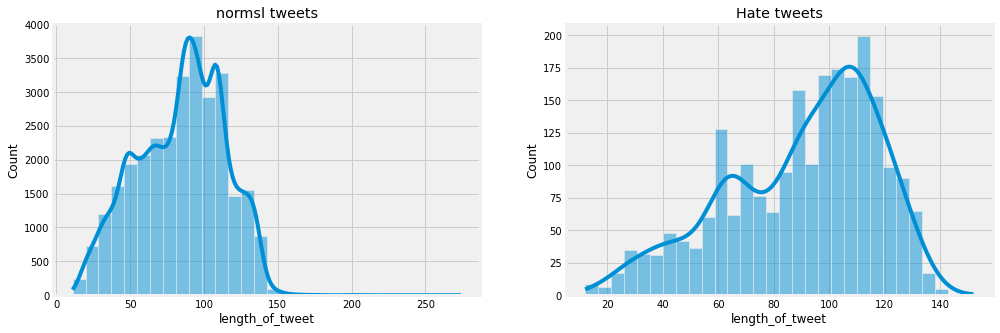

In [24]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.histplot(train_data[train_data["label"] == 0]["length_of_tweet"],bins = 30,ax = ax1, kde=True).set(title = "normsl tweets")
sns.histplot(train_data[train_data["label"] == 1]["length_of_tweet"],bins = 30,ax = ax2, kde = True).set(title = "Hate tweets")
plt.show()

In [25]:
#Min length is 11, so let's see it
train_data[train_data['length_of_tweet']==11]['tweet'].iloc[0]

'i love you '

In [26]:
#Max length is 274, so let's see it
train_data[train_data['length_of_tweet']==274]['tweet'].iloc[0]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

Split Negative and Positive Tweets

In [27]:
positive_tweets= train_data[train_data['label']==1]
positive_tweets

,id,label,tweet,length_of_tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot,74
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins,101
17,18,1,retweet if you agree!,22
23,24,1,@user @user lumpy says i am a . prove it lumpy.,47
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia,104
...,...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenny #kentucky,59
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'm proud! #mailboxpride #liberalisme,82
31947,31948,1,@user @user you don't have the balls to hashtag me as a but you say i am to weasel away.. lumpy tony.. dipshit.,112
31948,31949,1,"makes you ask yourself, who am i? then am i anybody? until ....god . oh thank you god!",87


In [28]:
negative_tweets = train_data[train_data['label']==0]
negative_tweets

,id,label,tweet,length_of_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,102
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86
4,5,0,factsguide: society now #motivation,39
...,...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first time in 2 years,61
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,68
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,131
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,63


In [29]:
# Exact numbers of positive tweet length
print('\033[5m'+'Positive Tweets:'+"\033[0;0m")
print('Minimum number of words are',positive_tweets.length_of_tweet.min())
print('Maximum number of words are',positive_tweets.length_of_tweet.max())

Positive Tweets:
Minimum number of words are 12
Maximum number of words are 152


In [30]:
# Exact numbers of negative tweet length
print('\033[5m'+'Negative Tweets:'+"\033[0;0m")
print('Minimum number of words are',negative_tweets.length_of_tweet.min())
print('Maximum number of words are',negative_tweets.length_of_tweet.max())

Negative Tweets:
Minimum number of words are 11
Maximum number of words are 274


BOX PLOT

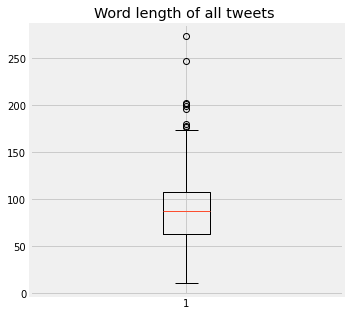

In [31]:
#Box plot of all data
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(train_data.length_of_tweet)
plt.title('Word length of all tweets ')
plt.show()


The x-axis represents 'tweets' while the y-axis represents number of characters.


The number of characters between 25th and 75th %ile (Interquartile range) of data ranges from 60 to 110 tokens, median being 80 tokens. Max length of any tweet in the dataset is less than 275 tokens

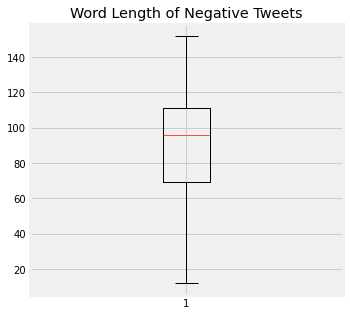

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(train_data[train_data['label']==1].length_of_tweet)
plt.title('Word Length of Negative Tweets')
plt.show()

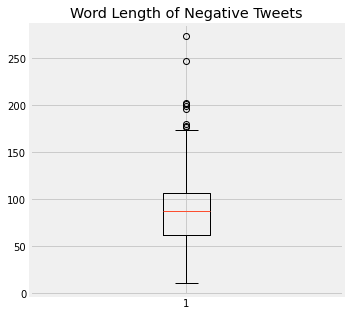

In [33]:
#Box plot of negative tweets
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(train_data[train_data['label']==0].length_of_tweet)
plt.title('Word Length of Negative Tweets')
plt.show()

Box plot analysis

1. Negative class: There are few outliers and the maximum length of the tweets going beyond 270
    
2. Positive class: There are no ouliers and the maximum numbers of words in a tweet are approxx 150

# DATA CLEANING :

In [34]:
# Data Import
import re 
import nltk
import string

plt.style.use('fivethirtyeight')

from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

%matplotlib inline

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [35]:
train_df = pd.read_csv(r"D:\hate speech\Hate-speech-detection-main\hate-speech-data\train.csv")
test_df = pd.read_csv(r"D:\hate speech\Hate-speech-detection-main\hate-speech-data\test.csv")

In [36]:
combi = train_df.append(test_df, ignore_index=True)
combi.shape

(49159, 3)

In [37]:
combi

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"


In [38]:
# This function will look inside the "input text" and replace the pattern with '' if found.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

We will do the following pre-processing steps:

Twitter handles: We will remove the twitter handles as they are already masked as @user due to privacy concerns. These twitter handles hardly give any information about the nature of the tweet.

Punctuations, numbers and even special characters will also be removed since they wouldn’t help in differentiating different types of tweets.

Short words: Words like ‘pdx’, ‘his’, ‘all’ do not add much value. So, we will try to remove them as well from our data.

Text data normalization: Terms like loves, loving, and lovable can be normalized to their base word, i.e., ‘love’. This will help reduce the total number of unique words in our data without losing a significant amount of information.

In [39]:
# Removing Twitter Handles (@user)
combi["tidy_tweet"]= np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [40]:
# Removing Punctuations, Numbers, and Special Characters
combi['tidy_tweet']= combi['tidy_tweet'].str.replace('[^a-zA-Z#]',' ')
combi.head(10)

C:\Users\ARJITG~1\AppData\Local\Temp/ipykernel_10224/1892711930.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet']= combi['tidy_tweet'].str.replace('[^a-zA-Z#]',' ')


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [41]:
# the "join" function will tail a word only if its length is greater than or equal to 3
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [44]:
# Lower Casing
combi["tidy_tweet"]= combi['tidy_tweet'].apply(lambda x:" ".join(x.lower() for x in x.split()))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [45]:
# Python’s re.compile() method is used to compile a regular expression pattern provided as a 
# string into a regex pattern object (re.Pattern). Later we can use this pattern object to 
# search for a match inside different target strings using regex methods such as a re.match() 
# or re.search().
# Syntax: re.compile(pattern)

CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

# the function will replace the above pattern with ''.
def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

In [46]:
combi["tidy_tweet"] = combi["tidy_tweet"].apply(cleanhtml)
combi

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation #trump #uselections #leadership #politics #brexit #blm
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling like mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned today #ohio used words like assets liability never once #clinton thee word #radicalization
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",happy work conference right mindset leads culture development organizations #work #mindset


In [47]:
# Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe.
import re
contractions_dict = {
        'didn\'t': 'did not',
        'don\'t': 'do not',
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he had / he would",
        "he'd've": "he would have",
        "he'll": "he shall / he will",
        "he'll've": "he shall have / he will have",
        "he's": "he has / he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how has / how is / how does",
        "I'd": "I had / I would",
        "I'd've": "I would have",
        "I'll": "I shall / I will",
        "I'll've": "I shall have / I will have",
        "I'm": "I am",
        "I've": "I have",
        "isn't": "is not",
        "it'd": "it had / it would",
        "it'd've": "it would have",
        "it'll": "it shall / it will",
        "it'll've": "it shall have / it will have",
        "it's": "it has / it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she had / she would",
        "she'd've": "she would have",
        "she'll": "she shall / she will",
        "she'll've": "she shall have / she will have",
        "she's": "she has / she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as / so is",
        "that'd": "that would / that had",
        "that'd've": "that would have",
        "that's": "that has / that is",
        "there'd": "there had / there would",
        "there'd've": "there would have",
        "there's": "there has / there is",
        "they'd": "they had / they would",
        "they'd've": "they would have",
        "they'll": "they shall / they will",
        "they'll've": "they shall have / they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we had / we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what shall / what will",
        "what'll've": "what shall have / what will have",
        "what're": "what are",
        "what's": "what has / what is",
        "what've": "what have",
        "when's": "when has / when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where has / where is",
        "where've": "where have",
        "who'll": "who shall / who will",
        "who'll've": "who shall have / who will have",
        "who's": "who has / who is",
        "who've": "who have",
        "why's": "why has / why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you had / you would",
        "you'd've": "you would have",
        "you'll": "you shall / you will",
        "you'll've": "you shall have / you will have",
        "you're": "you are",
        "you've": "you have"
}

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [48]:
def expand_contractions(s, contractions_dict=contractions_dict):
     def replace(match):
         return contractions_dict[match.group(0)]
     return contractions_re.sub(replace, s)

In [49]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(expand_contractions)
combi

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation #trump #uselections #leadership #politics #brexit #blm
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling like mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned today #ohio used words like assets liability never once #clinton thee word #radicalization
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",happy work conference right mindset leads culture development organizations #work #mindset


# Remove stopwords

In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Arjit
[nltk_data]     Giri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [52]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunctional selfish drags kids dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


2.8 Remove frequent words
We can also remove commonly occurring words from our text data.

First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

In [53]:
# Frequency of common words in all the tweets
common_top20 = pd.Series(' '.join(combi['tidy_tweet']).split()).value_counts()[:20]
print(common_top20)

# Remove these top 20 freq words
common = list(common_top20.index)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in common))
combi.head()

happy        2450
#love        2366
love         1906
time         1709
today        1566
like         1501
#positive    1331
people       1249
good         1219
life         1126
want          986
take          938
bihday        916
#healthy      900
make          847
#smile        826
father        790
need          782
bull          774
days          761
dtype: int64


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [54]:
# Frequency of common words in all the tweets
rare_top20 = pd.Series(" ".join(combi['tidy_tweet']).split()).value_counts()[-20:]
print(rare_top20)

# Remove these top 20 common words
rare = list(rare_top20.index)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))
combi.head()

#clop                   1
#twilightsparkle        1
#ladyinred              1
#indianbeautyblogger    1
#jeffroradio            1
swatch                  1
idolizes                1
#linstening             1
#lessthanhalf           1
#austrianblogger        1
#drumnbass              1
#tenorfly               1
junglist                1
surest                  1
#felicita               1
#mining                 1
#almostatmtgoal         1
#lucky#girl             1
eekk                    1
#shoegaze               1
dtype: int64


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [55]:
combi

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation #trump #uselections #leadership #politics #brexit #blm
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned #ohio used words assets liability never #clinton thee word #radicalization
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",work conference right mindset leads culture development organizations #work #mindset


In [56]:
combi

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation #trump #uselections #leadership #politics #brexit #blm
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned #ohio used words assets liability never #clinton thee word #radicalization
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",work conference right mindset leads culture development organizations #work #mindset


In [57]:
combi.to_csv(r"D:\hate speech\Hate-speech-detection-main\data_cleaned_pd.csv")

In [58]:
df = pd.read_csv(r"D:\hate speech\Hate-speech-detection-main\data_cleaned_pd.csv")

In [59]:
df

,Unnamed: 0,id,label,tweet,tidy_tweet
0,0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run
1,1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked
2,2,3,0.0,bihday your majesty,majesty
3,3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model
4,4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...,...
49154,49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation #trump #uselections #leadership #politics #brexit #blm
49155,49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid
49156,49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned #ohio used words assets liability never #clinton thee word #radicalization
49157,49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",work conference right mindset leads culture development organizations #work #mindset


# Hashtag Analysis

This includes:

- Extract hashtags
- Most common hashtags
- Most common hatred hashtags
- Most common non-hatred hashtags

In [60]:
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split())) #filter those start with (#)
    tweets = re.sub('[^a-zA-Z]',' ',  tweets) #keep only alphabetics
    tweets = tweets.lower() #convert to lowercase
    tweets = [lemma.lemmatize(word) for word in tweets] #do lemmatization to hashtags
    tweets = "".join(tweets) #join tweets
    return tweets

In [61]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Arjit
[nltk_data]     Giri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [62]:
df['hashtag'] = df.tweet.apply(extract_hashtag)
df

,Unnamed: 0,id,label,tweet,tidy_tweet,hashtag
0,0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run,run
1,1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked,lyft disapointed getthanked
2,2,3,0.0,bihday your majesty,majesty,
3,3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model,model
4,4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation
...,...,...,...,...,...,...
49154,49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation #trump #uselections #leadership #politics #brexit #blm,trump uselections leadership politics brexit blm
49155,49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid,hairflip neverready formal wedding gown dresses mermaid
49156,49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned #ohio used words assets liability never #clinton thee word #radicalization,hillary campaigned ohio omg clinton radicalization
49157,49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",work conference right mindset leads culture development organizations #work #mindset,work mindset


In [63]:
# Most common hashtags
freq_all_hashtag = FreqDist(list((" ".join(df.hashtag)).split())).most_common(20)
freq_all_hashtag

[('love', 2442),
 ('positive', 1332),
 ('healthy', 904),
 ('smile', 856),
 ('thankful', 724),
 ('fun', 700),
 ('life', 677),
 ('summer', 587),
 ('model', 576),
 ('affirmation', 552),
 ('cute', 543),
 ('fathersday', 543),
 ('blog', 524),
 ('i', 520),
 ('me', 517),
 ('am', 477),
 ('beautiful', 464),
 ('altwaystoheal', 462),
 ('gold', 447),
 ('family', 446)]

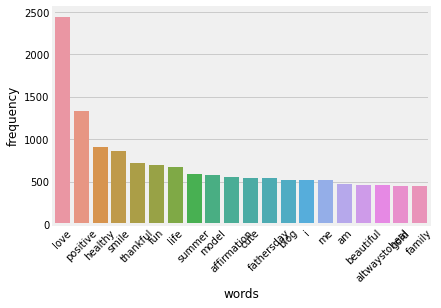

In [64]:

df_allhashtag = pd.DataFrame(freq_all_hashtag, columns= ['words', 'frequency'])
sns.barplot(x='words', y='frequency', data = df_allhashtag)
plt.xticks(rotation = 45)
plt.title= ('hastag word frequency')


In [65]:
#Most common hatred hastag
freq_hatred_hastag = FreqDist(list((" ".join(df[df['label']==1]['hashtag'])).split())).most_common(20)
freq_hatred_hastag

[('trump', 134),
 ('politics', 95),
 ('allahsoil', 92),
 ('libtard', 76),
 ('liberal', 75),
 ('sjw', 74),
 ('retweet', 63),
 ('miami', 46),
 ('black', 44),
 ('hate', 32),
 ('tampa', 32),
 ('s', 28),
 ('bigot', 28),
 ('blm', 28),
 ('hispanic', 28),
 ('brexit', 27),
 ('sikh', 27),
 ('calgary', 27),
 ('temple', 26),
 ('wso', 26)]

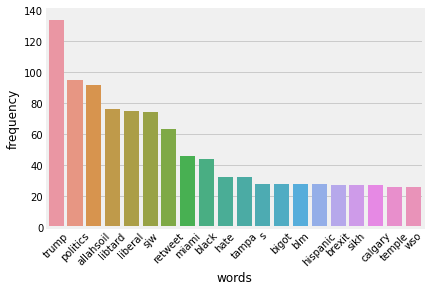

In [66]:
df_hatredhashtag = pd.DataFrame(freq_hatred_hastag, columns=['words','frequency'])
sns.barplot(x='words', y='frequency', data= df_hatredhashtag)
plt.xticks(rotation = 45)
 
plt.show()

Most Common non-hatred Hashtag

In [67]:
# Most Common non-hatred Hashtag
freq_non_hatred_hashtag = FreqDist(list((" ".join(df[df['label']==0]['hashtag'])).split())).most_common(20)
freq_non_hatred_hashtag

[('love', 1580),
 ('positive', 879),
 ('smile', 577),
 ('healthy', 575),
 ('thankful', 471),
 ('fun', 463),
 ('life', 437),
 ('summer', 392),
 ('model', 365),
 ('cute', 364),
 ('affirmation', 363),
 ('blog', 352),
 ('fathersday', 340),
 ('i', 338),
 ('me', 336),
 ('am', 315),
 ('gold', 301),
 ('silver', 300),
 ('altwaystoheal', 295),
 ('beautiful', 290)]

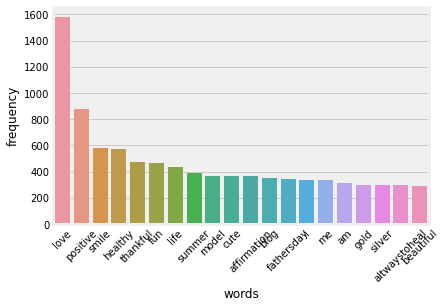

In [68]:
df_non_hatred_hashtag = pd.DataFrame(freq_non_hatred_hashtag, columns=['words','frequency'])
sns.barplot(x='words', y='frequency', data= df_non_hatred_hashtag)
plt.xticks(rotation=45)

plt.show()

3) Basic features

This includes:

- Count number of words
- Count number of characters
- Average word length
- Number of stopwords
- Number of special characters
- Number of numerics
- Number of Uppercase words
- N-grams

Count number of words

1. One of the most basic requirement in NLP analysis is to count the number of words in each tweet. The idea behind this is that the negative sentiments contain a lesser amount of words than the positive ones.

2. We can accomplish the above task (count the number of words) by using the split function in python as follows-

In [69]:
# define word count function
def no_of_words(df):
    df['word_count'] = df['tweet'].apply(lambda x : len(str(x).split(" ")))

In [70]:
# call the function
no_of_words(df)
df

,Unnamed: 0,id,label,tweet,tidy_tweet,hashtag,word_count
0,0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run,run,21
1,1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked,lyft disapointed getthanked,22
2,2,3,0.0,bihday your majesty,majesty,,5
3,3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model,model,17
4,4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8
...,...,...,...,...,...,...,...
49154,49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation #trump #uselections #leadership #politics #brexit #blm,trump uselections leadership politics brexit blm,13
49155,49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid,hairflip neverready formal wedding gown dresses mermaid,15
49156,49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned #ohio used words assets liability never #clinton thee word #radicalization,hillary campaigned ohio omg clinton radicalization,20
49157,49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",work conference right mindset leads culture development organizations #work #mindset,work mindset,15


Count number of characters

1. We can also calculate the number of characters in every tweet. The intuition is same as above.


2. This can be accomplised by calculating the length of the tweet as follows -

In [71]:
def no_of_char(df):
    df['char_count']= df['tweet'].str.len()
no_of_char(df)
df.head()

,Unnamed: 0,id,label,tweet,tidy_tweet,hashtag,word_count,char_count
0,0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run,run,21,102
1,1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked,lyft disapointed getthanked,22,122
2,2,3,0.0,bihday your majesty,majesty,,5,21
3,3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model,model,17,86
4,4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39


3.3 Average word length

1. There is also another feature which is also important is average word length of each tweet. This feature can help us improve our model.

2. Average is found by taking the sum of the length of all the words and divide it by the total length of the tweet.

In [72]:
def avg_word(sentence):
    words = sentence.split()
    average = sum(len(word) for word in words)/ len(words)
    return average

In [73]:
def avg_word_length(df):
    df['avg_words'] = df['tweet'].apply(lambda x: avg_word(x))

In [74]:
avg_word_length(df)
df.head()

,Unnamed: 0,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_words
0,0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556
1,1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked,lyft disapointed getthanked,22,122,5.315789
2,2,3,0.0,bihday your majesty,majesty,,5,21,5.666667
3,3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model,model,17,86,4.928571
4,4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000


3.4 Number of stopwords

Sometimes calculating the number of stopwords can also give us some extra information which we might have been losing before.

In [75]:
stop = stopwords.words('english')
set(stop)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [76]:
# build the function
def stop_words(df):
    df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [157]:
# Call the function
stop_words(df)
df.head()

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_words,stopwords,hashtags,numerics,upper_case
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked,lyft disapointed getthanked,22,122,5.315789,5,3,0,0
2,3,0.0,bihday your majesty,majesty,,5,21,5.666667,1,0,0,0
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model,model,17,86,4.928571,5,1,0,0
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0


Number of hashtags

1. We want to calculate the number of hashtags in it. It also helps in extracting extra information from our text data.

2. Here, we make use of the starts with function because hashtags always appear at the beginning of a word.

In [78]:
def hash_tags(df):
    df['hashtags'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

In [79]:
hash_tags(df)
df.head()

,Unnamed: 0,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_words,stopwords,hashtags
0,0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1
1,1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked,lyft disapointed getthanked,22,122,5.315789,5,3
2,2,3,0.0,bihday your majesty,majesty,,5,21,5.666667,1,0
3,3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model,model,17,86,4.928571,5,1
4,4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1


Number of numerics

1. We can also find the number of numerics which are present in the tweets.

2. It is a useful feature that should be run while doing similar exercises.

In [80]:
def num_numerics(df):
    df['numerics'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [81]:
num_numerics(df)
df.head()

,Unnamed: 0,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_words,stopwords,hashtags,numerics
0,0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0
1,1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked,lyft disapointed getthanked,22,122,5.315789,5,3,0
2,2,3,0.0,bihday your majesty,majesty,,5,21,5.666667,1,0,0
3,3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model,model,17,86,4.928571,5,1,0
4,4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0


Number of Uppercase words

1. Sometimes, it is also necessary to identify UPPERCASE words in a sentence.

In [82]:
def num_uppercase(df):
    df['upper_case'] = df['tweet'].apply(lambda x: len([ x for x in x.split() if x.isupper()]))

In [83]:
num_uppercase(df)
df.head()

,Unnamed: 0,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_words,stopwords,hashtags,numerics,upper_case
0,0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0
1,1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked,lyft disapointed getthanked,22,122,5.315789,5,3,0,0
2,2,3,0.0,bihday your majesty,majesty,,5,21,5.666667,1,0,0,0
3,3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model,model,17,86,4.928571,5,1,0,0
4,4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0


In [84]:
from textblob import TextBlob


In [85]:
def extract_ngrams(data, num):
    '''
    Function to generate n-grams from sentences
    '''
    n_grams = TextBlob(data).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]

In [86]:
data = df['tweet'][0]

print("1-gram: ", extract_ngrams(data, 1))
print("2-gram: ", extract_ngrams(data, 2))
print("3-gram: ", extract_ngrams(data, 3))
print("4-gram: ", extract_ngrams(data, 4))

1-gram:  ['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run']
2-gram:  ['user when', 'when a', 'a father', 'father is', 'is dysfunctional', 'dysfunctional and', 'and is', 'is so', 'so selfish', 'selfish he', 'he drags', 'drags his', 'his kids', 'kids into', 'into his', 'his dysfunction', 'dysfunction run']
3-gram:  ['user when a', 'when a father', 'a father is', 'father is dysfunctional', 'is dysfunctional and', 'dysfunctional and is', 'and is so', 'is so selfish', 'so selfish he', 'selfish he drags', 'he drags his', 'drags his kids', 'his kids into', 'kids into his', 'into his dysfunction', 'his dysfunction run']
4-gram:  ['user when a father', 'when a father is', 'a father is dysfunctional', 'father is dysfunctional and', 'is dysfunctional and is', 'dysfunctional and is so', 'and is so selfish', 'is so selfish he', 'so selfish he drags', 'selfish he drags his', 'he drags his kids', 'dra

In [87]:
import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to C:\Users\Arjit
[nltk_data]     Giri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for nlp
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

# for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

# for Lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# save and load models
import pickle

# import warnings
import warnings
warnings.filterwarnings("ignore")

In [89]:
df

,Unnamed: 0,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_words,stopwords,hashtags,numerics,upper_case
0,0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0
1,1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked,lyft disapointed getthanked,22,122,5.315789,5,3,0,0
2,2,3,0.0,bihday your majesty,majesty,,5,21,5.666667,1,0,0,0
3,3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model,model,17,86,4.928571,5,1,0,0
4,4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation #trump #uselections #leadership #politics #brexit #blm,trump uselections leadership politics brexit blm,13,108,8.727273,0,6,0,0
49155,49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid,hairflip neverready formal wedding gown dresses mermaid,15,96,6.307692,1,7,0,0
49156,49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned #ohio used words assets liability never #clinton thee word #radicalization,hillary campaigned ohio omg clinton radicalization,20,145,7.411765,3,5,0,0
49157,49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",work conference right mindset leads culture development organizations #work #mindset,work mindset,15,104,7.500000,2,2,0,0


In [90]:
df.drop('Unnamed: 0',axis=1, inplace = True)

In [91]:
df

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_words,stopwords,hashtags,numerics,upper_case
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked,lyft disapointed getthanked,22,122,5.315789,5,3,0,0
2,3,0.0,bihday your majesty,majesty,,5,21,5.666667,1,0,0,0
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model,model,17,86,4.928571,5,1,0,0
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation #trump #uselections #leadership #politics #brexit #blm,trump uselections leadership politics brexit blm,13,108,8.727273,0,6,0,0
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid,hairflip neverready formal wedding gown dresses mermaid,15,96,6.307692,1,7,0,0
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned #ohio used words assets liability never #clinton thee word #radicalization,hillary campaigned ohio omg clinton radicalization,20,145,7.411765,3,5,0,0
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",work conference right mindset leads culture development organizations #work #mindset,work mindset,15,104,7.500000,2,2,0,0


Re-split data into train and test

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          49159 non-null  int64  
 1   label       31962 non-null  float64
 2   tweet       49159 non-null  object 
 3   tidy_tweet  48810 non-null  object 
 4   hashtag     49159 non-null  object 
 5   word_count  49159 non-null  int64  
 6   char_count  49159 non-null  int64  
 7   avg_words   49159 non-null  float64
 8   stopwords   49159 non-null  int64  
 9   hashtags    49159 non-null  int64  
 10  numerics    49159 non-null  int64  
 11  upper_case  49159 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 4.5+ MB


In [93]:
# split the data based on label
train_df = df[0:31962]
test_df = df[31962:]

In [94]:
train_df

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_words,stopwords,hashtags,numerics,upper_case
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked,lyft disapointed getthanked,22,122,5.315789,5,3,0,0
2,3,0.0,bihday your majesty,majesty,,5,21,5.666667,1,0,0,0
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model,model,17,86,4.928571,5,1,0,0
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
31957,31958,0.0,ate @user isz that youuu?ðððððððððâ¤ï¸,youuu,,6,68,12.600000,1,0,0,0
31958,31959,0.0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,nina turner airwaves trying wrap mantle genuine hero shirley chisolm #shame #imwithher,shame imwithher,25,131,4.652174,9,2,0,0
31959,31960,0.0,listening to sad songs on a monday morning otw to work is sad,listening songs monday morning work,,15,63,3.769231,5,0,0,0
31960,31961,1.0,"@user #sikh #temple vandalised in in #calgary, #wso condemns act",#sikh #temple vandalised #calgary #wso condemns,sikh temple calgary wso,13,67,5.500000,2,4,0,0


In [95]:
# chek train dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          31962 non-null  int64  
 1   label       31962 non-null  float64
 2   tweet       31962 non-null  object 
 3   tidy_tweet  31751 non-null  object 
 4   hashtag     31962 non-null  object 
 5   word_count  31962 non-null  int64  
 6   char_count  31962 non-null  int64  
 7   avg_words   31962 non-null  float64
 8   stopwords   31962 non-null  int64  
 9   hashtags    31962 non-null  int64  
 10  numerics    31962 non-null  int64  
 11  upper_case  31962 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 2.9+ MB


In [96]:
train_df.isna().sum()

id              0
label           0
tweet           0
tidy_tweet    211
hashtag         0
word_count      0
char_count      0
avg_words       0
stopwords       0
hashtags        0
numerics        0
upper_case      0
dtype: int64

In [97]:
train_df = train_df[train_df['tidy_tweet'].notna()]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31751 entries, 0 to 31961
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          31751 non-null  int64  
 1   label       31751 non-null  float64
 2   tweet       31751 non-null  object 
 3   tidy_tweet  31751 non-null  object 
 4   hashtag     31751 non-null  object 
 5   word_count  31751 non-null  int64  
 6   char_count  31751 non-null  int64  
 7   avg_words   31751 non-null  float64
 8   stopwords   31751 non-null  int64  
 9   hashtags    31751 non-null  int64  
 10  numerics    31751 non-null  int64  
 11  upper_case  31751 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 3.1+ MB


In [98]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 31962 to 49158
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          17197 non-null  int64  
 1   label       0 non-null      float64
 2   tweet       17197 non-null  object 
 3   tidy_tweet  17059 non-null  object 
 4   hashtag     17197 non-null  object 
 5   word_count  17197 non-null  int64  
 6   char_count  17197 non-null  int64  
 7   avg_words   17197 non-null  float64
 8   stopwords   17197 non-null  int64  
 9   hashtags    17197 non-null  int64  
 10  numerics    17197 non-null  int64  
 11  upper_case  17197 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1.6+ MB


In [99]:
test_df.isna().sum()

id                0
label         17197
tweet             0
tidy_tweet      138
hashtag           0
word_count        0
char_count        0
avg_words         0
stopwords         0
hashtags          0
numerics          0
upper_case        0
dtype: int64

# Data vectorization (for train data)

In order to use textual data for predictive modeling, words need to then be encoded as integers, or floating-point values, for use as inputs in machine learning algorithms. This process is called feature extraction (or vectorization). This includes:


1. Word tokenization

2. Data normalization

3. Word stemming

4. Word Lemmatization

5. Bag of Words (BoW) with train data

6. Tf - idf with train data

In [100]:
# WORD TOKENIZATION
train_df['token'] = train_df['tidy_tweet'].apply(lambda x: word_tokenize(x))
train_df

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_words,stopwords,hashtags,numerics,upper_case,token
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0,"[dysfunctional, selfish, drags, kids, dysfunction, #, run]"
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked,lyft disapointed getthanked,22,122,5.315789,5,3,0,0,"[thanks, #, lyft, credit, cause, offer, wheelchair, vans, #, disapointed, #, getthanked]"
2,3,0.0,bihday your majesty,majesty,,5,21,5.666667,1,0,0,0,[majesty]
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model,model,17,86,4.928571,5,1,0,0,"[#, model]"
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0,"[factsguide, society, #, motivation]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,31958,0.0,ate @user isz that youuu?ðððððððððâ¤ï¸,youuu,,6,68,12.600000,1,0,0,0,[youuu]
31958,31959,0.0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,nina turner airwaves trying wrap mantle genuine hero shirley chisolm #shame #imwithher,shame imwithher,25,131,4.652174,9,2,0,0,"[nina, turner, airwaves, trying, wrap, mantle, genuine, hero, shirley, chisolm, #, shame, #, imwithher]"
31959,31960,0.0,listening to sad songs on a monday morning otw to work is sad,listening songs monday morning work,,15,63,3.769231,5,0,0,0,"[listening, songs, monday, morning, work]"
31960,31961,1.0,"@user #sikh #temple vandalised in in #calgary, #wso condemns act",#sikh #temple vandalised #calgary #wso condemns,sikh temple calgary wso,13,67,5.500000,2,4,0,0,"[#, sikh, #, temple, vandalised, #, calgary, #, wso, condemns]"


In [101]:
# WORD STEMMING
train_df['tweet_stemmed']= train_df['token'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
train_df

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_words,stopwords,hashtags,numerics,upper_case,token,tweet_stemmed
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0,"[dysfunctional, selfish, drags, kids, dysfunction, #, run]",dysfunct selfish drag kid dysfunct # run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked,lyft disapointed getthanked,22,122,5.315789,5,3,0,0,"[thanks, #, lyft, credit, cause, offer, wheelchair, vans, #, disapointed, #, getthanked]",thank # lyft credit caus offer wheelchair van # disapoint # getthank
2,3,0.0,bihday your majesty,majesty,,5,21,5.666667,1,0,0,0,[majesty],majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model,model,17,86,4.928571,5,1,0,0,"[#, model]",# model
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0,"[factsguide, society, #, motivation]",factsguid societi # motiv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,31958,0.0,ate @user isz that youuu?ðððððððððâ¤ï¸,youuu,,6,68,12.600000,1,0,0,0,[youuu],youuu
31958,31959,0.0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,nina turner airwaves trying wrap mantle genuine hero shirley chisolm #shame #imwithher,shame imwithher,25,131,4.652174,9,2,0,0,"[nina, turner, airwaves, trying, wrap, mantle, genuine, hero, shirley, chisolm, #, shame, #, imwithher]",nina turner airwav tri wrap mantl genuin hero shirley chisolm # shame # imwithh
31959,31960,0.0,listening to sad songs on a monday morning otw to work is sad,listening songs monday morning work,,15,63,3.769231,5,0,0,0,"[listening, songs, monday, morning, work]",listen song monday morn work
31960,31961,1.0,"@user #sikh #temple vandalised in in #calgary, #wso condemns act",#sikh #temple vandalised #calgary #wso condemns,sikh temple calgary wso,13,67,5.500000,2,4,0,0,"[#, sikh, #, temple, vandalised, #, calgary, #, wso, condemns]",# sikh # templ vandalis # calgari # wso condemn


In [102]:
# WORD LEMMATIZATION
train_df['tweet_lemmatized'] = train_df['token'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
train_df.head()

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_words,stopwords,hashtags,numerics,upper_case,token,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0,"[dysfunctional, selfish, drags, kids, dysfunction, #, run]",dysfunct selfish drag kid dysfunct # run,dysfunctional selfish drag kid dysfunction # run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked,lyft disapointed getthanked,22,122,5.315789,5,3,0,0,"[thanks, #, lyft, credit, cause, offer, wheelchair, vans, #, disapointed, #, getthanked]",thank # lyft credit caus offer wheelchair van # disapoint # getthank,thanks # lyft credit cause offer wheelchair van # disapointed # getthanked
2,3,0.0,bihday your majesty,majesty,,5,21,5.666667,1,0,0,0,[majesty],majesti,majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model,model,17,86,4.928571,5,1,0,0,"[#, model]",# model,# model
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0,"[factsguide, society, #, motivation]",factsguid societi # motiv,factsguide society # motivation


3.4 Bag of Words (BoW) with train data

CounterVectorization is a SciKitLearn library takes any text document and returns each unique word as a feature with the count of number of times that word occurs.

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df= 0.9, min_df=2, max_features=1000, stop_words ='english' )
bow_vectorizer

CountVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [104]:
# bag-of-words stemmed
trainbow_stem = bow_vectorizer.fit_transform(train_df['tweet_stemmed'])
trainbow_stem

<31751x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 105527 stored elements in Compressed Sparse Row format>

In [105]:
trainbow_stem.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [106]:
trainbow_lemm = bow_vectorizer.fit_transform(train_df['tweet_lemmatized'])
trainbow_lemm

<31751x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 95447 stored elements in Compressed Sparse Row format>

In [107]:
trainbow_lemm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

3.5 Tf - idf with train data

TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document) IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in. TF-IDF = TF*IDF

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer,

(TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english'),)

In [109]:
traintfidf_stem = tfidf_vectorizer.fit_transform(train_df['tweet_stemmed'])
traintfidf_stem.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [110]:
traintfidf_lemm = tfidf_vectorizer.fit_transform(train_df['tweet_lemmatized'])
traintfidf_lemm.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

 Data vectorization (for test data)¶
 
This includes: - Word tokenization - Word stemming - Word Lemmatization - BoW with test data - TF-IDF with test data

In [111]:
# feature selection of few columns
test_df = test_df[['id','tweet','tidy_tweet']]
test_df.head(2)

,id,tweet,tidy_tweet
31962,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,#studiolife #aislife #requires #passion #dedication #willpower find #newmaterials
31963,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,#white #supremacists everyone #birds #movie


In [112]:
# Take only the rows where data is not NA:
test_df.isna().sum()

id              0
tweet           0
tidy_tweet    138
dtype: int64

In [113]:
test_df.head()

,id,tweet,tidy_tweet
31962,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,#studiolife #aislife #requires #passion #dedication #willpower find #newmaterials
31963,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,#white #supremacists everyone #birds #movie
31964,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,safe ways heal #acne #altwaystoheal #healing
31965,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",cursed child book reservations already #harrypotter #pottermore #favorite
31966,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",#bihday amazing hilarious #nephew ahmir uncle dave loves misses


In [114]:
test_df = test_df[test_df['tidy_tweet'].notna()]

In [115]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17059 entries, 31962 to 49158
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          17059 non-null  int64 
 1   tweet       17059 non-null  object
 2   tidy_tweet  17059 non-null  object
dtypes: int64(1), object(2)
memory usage: 533.1+ KB


In [117]:
# Word tokenization
test_df['token'] = test_df['tidy_tweet'].apply(lambda x: word_tokenize(x))
test_df.head()

,id,tweet,tidy_tweet,token
31962,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,#studiolife #aislife #requires #passion #dedication #willpower find #newmaterials,"[#, studiolife, #, aislife, #, requires, #, passion, #, dedication, #, willpower, find, #, newmaterials]"
31963,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,#white #supremacists everyone #birds #movie,"[#, white, #, supremacists, everyone, #, birds, #, movie]"
31964,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,safe ways heal #acne #altwaystoheal #healing,"[safe, ways, heal, #, acne, #, altwaystoheal, #, healing]"
31965,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",cursed child book reservations already #harrypotter #pottermore #favorite,"[cursed, child, book, reservations, already, #, harrypotter, #, pottermore, #, favorite]"
31966,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",#bihday amazing hilarious #nephew ahmir uncle dave loves misses,"[#, bihday, amazing, hilarious, #, nephew, ahmir, uncle, dave, loves, misses]"


In [118]:
# word_stemming
test_df['tweet_stemmed'] = test_df['token'].apply(lambda x: " ".join([stemming.stem(i) for i in x]))
test_df

,id,tweet,tidy_tweet,token,tweet_stemmed
31962,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,#studiolife #aislife #requires #passion #dedication #willpower find #newmaterials,"[#, studiolife, #, aislife, #, requires, #, passion, #, dedication, #, willpower, find, #, newmaterials]",# studiolif # aislif # requir # passion # dedic # willpow find # newmateri
31963,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,#white #supremacists everyone #birds #movie,"[#, white, #, supremacists, everyone, #, birds, #, movie]",# white # supremacist everyon # bird # movi
31964,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,safe ways heal #acne #altwaystoheal #healing,"[safe, ways, heal, #, acne, #, altwaystoheal, #, healing]",safe way heal # acn # altwaystoh # heal
31965,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",cursed child book reservations already #harrypotter #pottermore #favorite,"[cursed, child, book, reservations, already, #, harrypotter, #, pottermore, #, favorite]",curs child book reserv alreadi # harrypott # pottermor # favorit
31966,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",#bihday amazing hilarious #nephew ahmir uncle dave loves misses,"[#, bihday, amazing, hilarious, #, nephew, ahmir, uncle, dave, loves, misses]",# bihday amaz hilari # nephew ahmir uncl dave love miss
...,...,...,...,...,...
49154,49155,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation #trump #uselections #leadership #politics #brexit #blm,"[thought, factory, left, right, polarisation, #, trump, #, uselections, #, leadership, #, politics, #, brexit, #, blm]",thought factori left right polaris # trump # uselect # leadership # polit # brexit # blm
49155,49156,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid,"[feeling, mermaid, #, hairflip, #, neverready, #, formal, #, wedding, #, gown, #, dresses, #, mermaid]",feel mermaid # hairflip # neverreadi # formal # wed # gown # dress # mermaid
49156,49157,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned #ohio used words assets liability never #clinton thee word #radicalization,"[#, hillary, #, campaigned, #, ohio, used, words, assets, liability, never, #, clinton, thee, word, #, radicalization]",# hillari # campaign # ohio use word asset liabil never # clinton thee word # radic
49157,49158,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",work conference right mindset leads culture development organizations #work #mindset,"[work, conference, right, mindset, leads, culture, development, organizations, #, work, #, mindset]",work confer right mindset lead cultur develop organ # work # mindset


word lemmatization

In [119]:
# word lemmatization
test_df['tweet_lemmatized'] = test_df['token'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
test_df.head()

,id,tweet,tidy_tweet,token,tweet_stemmed,tweet_lemmatized
31962,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,#studiolife #aislife #requires #passion #dedication #willpower find #newmaterials,"[#, studiolife, #, aislife, #, requires, #, passion, #, dedication, #, willpower, find, #, newmaterials]",# studiolif # aislif # requir # passion # dedic # willpow find # newmateri,# studiolife # aislife # requires # passion # dedication # willpower find # newmaterials
31963,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,#white #supremacists everyone #birds #movie,"[#, white, #, supremacists, everyone, #, birds, #, movie]",# white # supremacist everyon # bird # movi,# white # supremacist everyone # bird # movie
31964,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,safe ways heal #acne #altwaystoheal #healing,"[safe, ways, heal, #, acne, #, altwaystoheal, #, healing]",safe way heal # acn # altwaystoh # heal,safe way heal # acne # altwaystoheal # healing
31965,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",cursed child book reservations already #harrypotter #pottermore #favorite,"[cursed, child, book, reservations, already, #, harrypotter, #, pottermore, #, favorite]",curs child book reserv alreadi # harrypott # pottermor # favorit,cursed child book reservation already # harrypotter # pottermore # favorite
31966,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",#bihday amazing hilarious #nephew ahmir uncle dave loves misses,"[#, bihday, amazing, hilarious, #, nephew, ahmir, uncle, dave, loves, misses]",# bihday amaz hilari # nephew ahmir uncl dave love miss,# bihday amazing hilarious # nephew ahmir uncle dave love miss


In [120]:
# Import Library
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.9, min_df= 2, max_features= 1000, stop_words = 'english')
bow_vectorizer

CountVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

BOW with test data

In [121]:
# bow stemmed (test data)
testbow_stem = bow_vectorizer.fit_transform(test_df['tweet_stemmed'])
testbow_stem.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [122]:
# bow lemmatized (test data)
testbow_lemm = bow_vectorizer.fit_transform(test_df['tweet_lemmatized'])
testbow_lemm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

TF-IDF with test data

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df= 0.9, min_df = 2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [124]:
testtfidf_stem = tfidf_vectorizer.fit_transform(test_df['tweet_stemmed'])
testtfidf_stem.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [125]:
testtfidf_lemm = tfidf_vectorizer.fit_transform(test_df['tweet_lemmatized'])
testtfidf_lemm.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Model Building: Sentiment Analysis

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, and TF-IDF vectors. We will use the following algorithms to build models:


Splitting the Dataset into Train and Test set

Logistic Regression

Logistic Regression (2)

Support Vector Machine (SVM)

Gaussian NB classifier

MultinomialNB classifier

Xgboost classifier

Decision Tree

Random Forest

Deep Learning Classification

Vader Pre-trained model

A Note on Evaluation Metrics


We will use the following evaluation metrics:


Accuracy score is the rate of correct predictions.Out of every 100 predictions made, the model was correct 94 times. It is used when we want to know the number of correct predictions, which is, when the algorithm correctly predicts a type T when it is actually type T. It takes into account all the possible classes and how much we predicted correctly.The score should be as high as possible.


F1 Score It is the weighted average of Precision and Recall is used when the datasets don't have an equal representation for each type that's being classified. Therefore, this score takes both false positives and false negatives into account. It is suitable for uneven class distribution problems. It is calculated as follows: F1 Score = 2 (Recall Precision) / (Recall + Precision)


A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. Confusion matrix represents accurate predictions made along the diagonal of the matrix.

Logistic Regression

In [126]:
X= traintfidf_lemm #x: predictors
y= train_df['label'] #y: label

In [127]:
xtrain,xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=42)

# Logistic Regression

In [128]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [129]:
predict_lr = lr.predict(xtest)

In [130]:
print("accuracy score :", accuracy_score(predict_lr,ytest))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(predict_lr,ytest))

print(confusion_matrix(predict_lr,ytest))
print(classification_report(predict_lr,ytest))

accuracy score : 0.9455175309678774
f1 score : 0.4188129899216126
[[8820  479]
 [  40  187]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      9299
         1.0       0.28      0.82      0.42       227

    accuracy                           0.95      9526
   macro avg       0.64      0.89      0.70      9526
weighted avg       0.98      0.95      0.96      9526



# SUPPRT VECTOR MACHINE (SVM)

In [136]:
svm= SVC()
svm.fit(xtrain,ytrain)
predict_svm = svm.predict(xtest)

In [137]:
print('accuracy score:', accuracy_score(predict_svm, ytest))
print('f1 score:', f1_score(predict_svm,ytest))
print(confusion_matrix(predict_svm, ytest))
print(classification_report(predict_svm, ytest))

accuracy score: 0.9495066134788999
f1 score: 0.4708470847084708
[[8831  452]
 [  29  214]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      9283
         1.0       0.32      0.88      0.47       243

    accuracy                           0.95      9526
   macro avg       0.66      0.92      0.72      9526
weighted avg       0.98      0.95      0.96      9526



Gaussian NB classifier

Naive Bayes is a classification technique based on Bayes' Theorem. Bayes’ theorem is based conditional probability which states the likelihood the occurrence of event “A” given another event “B” has already happened. There are 3 type of Naïve Bayes:

Gaussian -> The model assume that the data follows normal distribution and all our features are continuous.

Bernoulli -> It assumes that all our features are binary such that they only take two values: 0s and 1s.

Multinomial -> It assumes that the data has discreate value such as ratings between 1 to 5.

In [138]:
nb = GaussianNB()
nb.fit(xtrain.toarray(),ytrain)
predict_nb = nb.predict(xtest.toarray())

In [139]:
print('accuracy score: ', accuracy_score(predict_nb, ytest))
print('f1_score: ', f1_score(predict_nb, ytest))
print(confusion_matrix(predict_nb, ytest))
print(classification_report(predict_nb, ytest))

accuracy score:  0.5870249842536217
f1_score:  0.22892983143865148
[[5008   82]
 [3852  584]]
              precision    recall  f1-score   support

         0.0       0.57      0.98      0.72      5090
         1.0       0.88      0.13      0.23      4436

    accuracy                           0.59      9526
   macro avg       0.72      0.56      0.47      9526
weighted avg       0.71      0.59      0.49      9526



# MultinomialNB classifier

In [140]:
mlnb = MultinomialNB()
mlnb.fit(xtrain.toarray(),ytrain)
predict_mlnb=mlnb.predict(xtest.toarray())

In [141]:
# accuracy score
print("accuracy score :", accuracy_score(predict_mlnb,ytest))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(predict_mlnb,ytest))

print(confusion_matrix(predict_mlnb,ytest))
print(classification_report(predict_mlnb,ytest))

accuracy score : 0.943942893134579
f1 score : 0.3747072599531616
[[8832  506]
 [  28  160]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      9338
         1.0       0.24      0.85      0.37       188

    accuracy                           0.94      9526
   macro avg       0.62      0.90      0.67      9526
weighted avg       0.98      0.94      0.96      9526



# Xgboost classifier

In [142]:
xgb = XGBClassifier()
xgb.fit(xtrain.toarray(),ytrain)
predict_xgb=xgb.predict(xtest.toarray())

In [143]:
# accuracy score
print("accuracy score :", accuracy_score(predict_xgb,ytest))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(predict_xgb,ytest))

print(confusion_matrix(predict_xgb,ytest))
print(classification_report(predict_xgb,ytest))

accuracy score : 0.9473021205122821
f1 score : 0.45670995670995673
[[8813  455]
 [  47  211]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      9268
           1       0.32      0.82      0.46       258

    accuracy                           0.95      9526
   macro avg       0.66      0.88      0.71      9526
weighted avg       0.98      0.95      0.96      9526



# Decision Tree

In [144]:
dt = DecisionTreeClassifier()
dt.fit(xtrain.toarray(),ytrain)
predict_dt = dt.predict(xtest.toarray())

In [145]:
# accuracy score
print("accuracy score :", accuracy_score(predict_dt,ytest))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(predict_dt,ytest))

print(confusion_matrix(predict_dt,ytest))
print(classification_report(predict_dt,ytest))

accuracy score : 0.9443627965567919
f1 score : 0.5359019264448336
[[8690  360]
 [ 170  306]]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      9050
         1.0       0.46      0.64      0.54       476

    accuracy                           0.94      9526
   macro avg       0.72      0.80      0.75      9526
weighted avg       0.95      0.94      0.95      9526



# Random Forest

In [146]:
rf = RandomForestClassifier()
rf.fit(xtrain.toarray(),ytrain) # you can test with grid search methodology
predict_rf = rf.predict(xtest.toarray())

In [158]:
# accuracy score
print("accuracy score :", accuracy_score(predict_rf,ytest))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(predict_rf,ytest))

print(confusion_matrix(predict_rf,ytest))
print(classification_report(predict_rf,ytest))

accuracy score : 0.9525509132899433
f1 score : 0.5645472061657033
[[8781  373]
 [  79  293]]
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      9154
         1.0       0.44      0.79      0.56       372

    accuracy                           0.95      9526
   macro avg       0.72      0.87      0.77      9526
weighted avg       0.97      0.95      0.96      9526



# Deep Learning Classification

In [148]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, SpatialDropout1D
from keras.layers import Bidirectional

In [149]:
max_features = 220
tokenizer = Tokenizer(num_words = max_features, split = (' '))
tokenizer.fit_on_texts(train_df['tweet'].values)
X = tokenizer.texts_to_sequences(train_df['tweet'].values)

# making all the tokens into same sizes using padding.
X = pad_sequences(X, maxlen = max_features)
X.shape

(31751, 220)

In [150]:
Y = train_df['label'].values

In [151]:
model = Sequential()
model.add(Embedding(max_features, 64, input_length = X.shape[1], trainable=False))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(512, activation='relu')) 

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [152]:
model.fit(X, Y,batch_size=1500,epochs = 5)

Epoch 1/5
22/22 [==============================] - 1376s 62s/step - loss: 0.3588 - accuracy: 0.9269
Epoch 2/5
22/22 [==============================] - 1356s 60s/step - loss: 0.2578 - accuracy: 0.9295
Epoch 3/5
22/22 [==============================] - 1296s 59s/step - loss: 0.2571 - accuracy: 0.9295
Epoch 4/5
22/22 [==============================] - 1304s 59s/step - loss: 0.2558 - accuracy: 0.9295
Epoch 5/5
22/22 [==============================] - 1381s 63s/step - loss: 0.2551 - accuracy: 0.9295


In [153]:
prediction = model.predict(X)
classes_x=np.argmax(prediction,axis=1)

In [154]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y, classes_x)
print(score)

0.92951403105414
